In [50]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score


data = pd.read_csv("./data/whole_data.csv")
data = data.iloc[:, 1:]
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Action,Time,Event
0,0.62,0.03,0.10,0.28,0.43,0.67,0.38,0.12,0.15,0.88,0.72,0.89,0.43,0.36,0.43,0.66,0.16,0,0.47,1
1,0.12,0.87,0.43,0.28,0.02,0.23,0.82,0.14,0.81,0.68,0.53,0.24,0.05,0.01,0.96,0.98,0.34,0,1.39,1
2,0.37,0.06,0.47,0.86,0.86,0.33,0.01,0.90,0.79,0.43,0.64,0.84,0.05,0.56,0.01,0.77,0.62,0,3.61,1
3,0.57,0.39,0.65,0.76,0.83,0.92,0.57,0.60,0.34,0.35,0.44,0.93,0.44,0.65,0.61,0.25,0.96,0,1.02,1
4,0.82,0.00,0.26,0.27,0.82,0.68,0.43,0.92,0.81,0.26,0.66,0.04,0.10,0.93,0.82,0.37,0.09,1,2.07,1


In [55]:
X = data.iloc[:, :17]
y = data.iloc[:, 17]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

In [66]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score

# clf = TabNetClassifier()
clf = TabNetClassifier(n_d=100,
                       n_a=100,
                       n_steps=10)
#                        gamma=1.3,
#                        n_independent=2,
#                        n_shared=2)
clf.fit(X_train.to_numpy(), y_train.to_numpy(), X_val.to_numpy(), y_val.to_numpy(), patience=30)
pred = clf.predict(X_val.to_numpy())

Device used : cpu
Will train until validation stopping metric hasn't improved in 30 rounds.
---------------------------------------
| EPOCH |  train  |   valid  | total time (s)
| 1     | 0.40387 |  0.50509 |   1.2       
| 2     | 0.59997 |  0.55208 |   2.4       
| 3     | 0.72275 |  0.61435 |   3.6       
| 4     | 0.78841 |  0.63148 |   4.7       
| 5     | 0.83789 |  0.61331 |   5.9       
| 6     | 0.84318 |  0.77222 |   7.1       
| 7     | 0.83508 |  0.76134 |   8.2       
| 8     | 0.84584 |  0.76181 |   9.0       
| 9     | 0.84033 |  0.78241 |   9.9       
| 10    | 0.85729 |  0.69861 |   10.8      
| 11    | 0.85350 |  0.65000 |   11.9      
| 12    | 0.82934 |  0.63750 |   13.0      
| 13    | 0.83056 |  0.62894 |   14.2      
| 14    | 0.83266 |  0.65764 |   15.3      
| 15    | 0.84517 |  0.67465 |   16.5      
| 16    | 0.85119 |  0.67789 |   17.6      
| 17    | 0.84068 |  0.67396 |   18.7      
| 18    | 0.87640 |  0.68345 |   19.5      
| 19    | 0.85663 |  0.74051 |

In [67]:
accuracy_score(y_val, pred.round(0))

0.8432835820895522

In [68]:
test_data = pd.read_csv('./data/testX.csv')
test_data = test_data.iloc[:, 1:]

pred = clf.predict(test_data.to_numpy())

In [69]:
result = pd.DataFrame(zip(list(range(287)), map(int, pred.tolist())), columns=['Title', 'action'])
result.to_csv('./result/tabnet_result.csv', index=False)
result

,Title,action
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
281,281,1
282,282,0
283,283,0
284,284,0


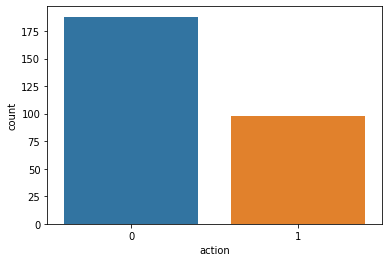

In [70]:
import seaborn as sns

sns.countplot(result.action)

In [77]:
np.sum(result.action == 1) / len(result.action) * 100

34.26573426573427

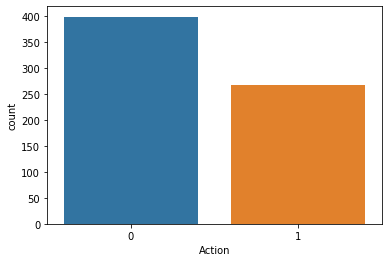

In [72]:
sns.countplot(data.Action)

In [76]:
import numpy as np

np.sum(data.Action == 1) / len(data.Action) * 100

40.090090090090094